<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/training/camera_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [3]:
import os
import pyarrow.parquet as pq

# Set the path to the metadata file
metadata_file_path = '/content/drive/MyDrive/training/camera_box/_metadata'

# Read the metadata file
metadata_file = pq.ParquetFile(metadata_file_path)

# Get the metadata
file_metadata = metadata_file.metadata
schema_metadata = file_metadata.metadata

# Print the metadata
print("File metadata:", file_metadata)
print("Schema metadata:", schema_metadata)

File metadata: <pyarrow._parquet.FileMetaData object at 0x7f2664f6a0e0>
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 12
  num_rows: 7817150
  num_row_groups: 798
  format_version: 2.6
  serialized_size: 1733768
Schema metadata: {b'ARROW:schema': b'/////yAMAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAHgIAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAABQCAAABAAAAEAIAAB7ImNvbHVtbl9pbmRleGVzIjogW3siZmllbGRfbmFtZSI6IG51bGwsICJtZXRhZGF0YSI6IHsiZW5jb2RpbmciOiAiVVRGLTgifSwgIm5hbWUiOiBudWxsLCAibnVtcHlfdHlwZSI6ICJvYmplY3QiLCAicGFuZGFzX3R5cGUiOiAidW5pY29kZSJ9XSwgImNvbHVtbnMiOiBbeyJuYW1lIjogImluZGV4IiwgImZpZWxkX25hbWUiOiAiaW5kZXgiLCAibWV0YWRhdGEiOiBudWxsLCAibnVtcHlfdHlwZSI6ICJvYmplY3QiLCAicGFuZGFzX3R5cGUiOiAiYnl0ZXMifSwgeyJuYW1lIjogImtleS5zZWdtZW50X2NvbnRleHRfbmFtZSIsICJmaWVsZF9uYW1lIjogImtleS5zZWdtZW50X2NvbnRleHRfbmFtZSIsICJtZXRhZGF0YSI6IG51bGwsICJudW1weV90eXBlIjogIm9iamVjdCIsICJwYW5kYXNfdHlwZSI6ICJieXRlcyJ9LCB7Im5hbWUiOiAia2V5LmZyYW1lX3RpbWVzdGFtcF9taWNyb3MiLCAiZmllbGRfbmFtZSI

In [4]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/training/camera_box/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

                                                               key.segment_context_name  \
index                                                                                     
15832924468527961_1564_160_1584_160;15076788268...  15832924468527961_1564_160_1584_160   
15832924468527961_1564_160_1584_160;15076788269...  15832924468527961_1564_160_1584_160   
15832924468527961_1564_160_1584_160;15076788270...  15832924468527961_1564_160_1584_160   
15832924468527961_1564_160_1584_160;15076788271...  15832924468527961_1564_160_1584_160   
15832924468527961_1564_160_1584_160;15076788272...  15832924468527961_1564_160_1584_160   
15832924468527961_1564_160_1584_160;15076788273...  15832924468527961_1564_160_1584_160   
15832924468527961_1564_160_1584_160;15076788274...  15832924468527961_1564_160_1584_160   
15832924468527961_1564_160_1584_160;15076788275...  15832924468527961_1564_160_1584_160   
15832924468527961_1564_160_1584_160;15076788276...  15832924468527961_1564_160_1584_160   

In [5]:
print(df.columns)

Index(['key.segment_context_name', 'key.frame_timestamp_micros',
       'key.camera_name', 'key.camera_object_id',
       '[CameraBoxComponent].box.center.x',
       '[CameraBoxComponent].box.center.y', '[CameraBoxComponent].box.size.x',
       '[CameraBoxComponent].box.size.y', '[CameraBoxComponent].type',
       '[CameraBoxComponent].difficulty_level.detection',
       '[CameraBoxComponent].difficulty_level.tracking'],
      dtype='object')


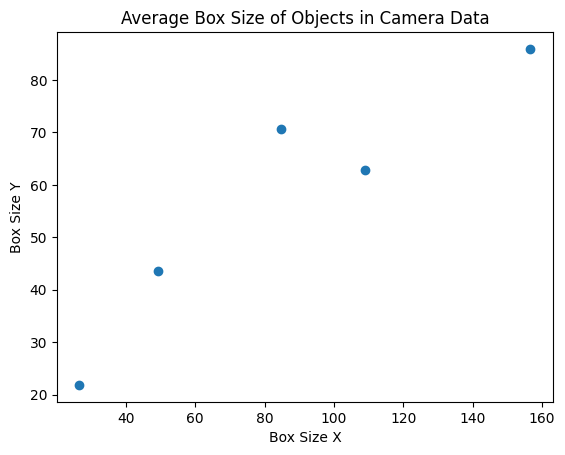

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .parquet file
data = pd.read_parquet('/content/drive/MyDrive/training/camera_box/file1.parquet')

# Select the columns to visualize
columns_to_visualize = ['[CameraBoxComponent].box.size.x', '[CameraBoxComponent].box.size.y']

# Group the data by object id and get the mean of the selected columns
grouped_data = data.groupby('key.camera_name')[columns_to_visualize].mean()

# Create a scatter plot of the grouped data
plt.scatter(grouped_data['[CameraBoxComponent].box.size.x'], grouped_data['[CameraBoxComponent].box.size.y'])

# Set the title and axis labels
plt.title('Average Box Size of Objects in Camera Data')
plt.xlabel('Box Size X')
plt.ylabel('Box Size Y')

# Display the plot
plt.show()